# Part I - Ford-Go-Bike-Feb-2019 : Communicate Data Findings
## by Asiimwe Victor Emmanuel

### Quick link Shortcuts
<a href="#introduce">Introduction</a><br>
<a href="#wrangle">Preliminary Wrangling</a><br>
<a href="#1variable">Univariate Exploration</a><br>
<a href="#2variables">Bivariate Exploration</a><br>
<a href="#manyvariables">Multivariate Exploration</a><br>
<a href="#conclude">Conclusions</a>

<a id='introduce'></a>
## Introduction
> The Ford Go Bike 2019 dataset is about individual bike rides in the bike sharing system covering the greater San Francisco Bay Area

<a id='wrangle'></a>
## Preliminary Wrangling

### a. Gathering

**1. Import all relevant libraries, packages and modules**

In [2]:
# importing relevant libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar as cal
import math 
import time as tm

In [3]:
# setting plots to be embedded inline
%matplotlib inline

In [4]:
# importing warnings module to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

**2. Load the 2019 ford bike dataset into a pandas dataframe and describe its properties**


In [5]:
# loading the 'fordgobike' csv file dataset into a pandas dataframe
ford_bike_2019 = pd.read_csv('201902-fordgobike-tripdata.csv')

### b. Assessing

### What is the structure of your dataset?

<div class="alert alert-block alert-info"><b>The dataset has 183412 data rows and 16 data columns, that is, 183412 trips and 16 features(related details).<br><br>7 features have the float data type, 2 features have the integer data type, and the other 7 have the integer data type</b></div>

**3. Define a simple function that will display short summaries of the ford-bike dataset structure and invoke it later on**

In [6]:
# defining a function to explore the dataset structure

def structure_insights(a):
    a.info()
    print('*'* 75)
    print(' ')
    print('(rows, columns): ', a.shape)
    print('*'* 75)
    print(' ')
    print('column label list: ')
    print(a.columns)
    print('*'* 75)
    print(' ')
    print('The dataset has {} trips and {} indicators.'.format(a.shape[0], a.shape[1]))

In [7]:
# invoking the structure_insights(a) function to understand the entire dataset structure

structure_insights(ford_bike_2019)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
*********************


### What is/are the main feature(s) of interest in your dataset?

<div class="alert alert-block alert-info">
<b>The main feature of interest is 'duration-sec' because it is used as a unit of measurement to charge both the subscribers and customers alike for the enterprise.</b></div>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
<div class="alert alert-block alert-info"><b>
    The 'member_birth_year' feature will be crucial when determining the age of the riders, the 'duration-sec' will be crucial when converting the units to smaller time units like minutes, the 'start_time' feature will also come in handy with generating start hours, and dates for each bike ride.</b><div>

**4. Check for missing values, duplicate values, wrong data types** 

- _**issue#1**: some features have missing values_
- _**issue#2**: wrong data types for some features_<br>
- _**issue#3**: some features may need to be split further_ <br>

In [8]:
# checking for the datatypes of the columns in the bike dataset
ford_bike_2019.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
# returning the number of duplicated rows in the ford_bike_2019 dataset
ford_bike_2019.duplicated().sum()

0

In [10]:
# returning the number of missing values per data column
columns = ['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip']

for i in columns:
    print(('missing values in '+i+' are '), ford_bike_2019[i].isna().sum())
    print('*'*30)
    print(' ')

missing values in duration_sec are  0
******************************
 
missing values in start_time are  0
******************************
 
missing values in end_time are  0
******************************
 
missing values in start_station_id are  197
******************************
 
missing values in start_station_name are  197
******************************
 
missing values in start_station_latitude are  0
******************************
 
missing values in start_station_longitude are  0
******************************
 
missing values in end_station_id are  197
******************************
 
missing values in end_station_name are  197
******************************
 
missing values in end_station_latitude are  0
******************************
 
missing values in end_station_longitude are  0
******************************
 
missing values in bike_id are  0
******************************
 
missing values in user_type are  0
******************************
 
missing values in member_birt

### Cleaning

- _**issue#1**: some features have missing values_

#### Define: 

- start_station_id, start_station_name has 197 missing values
- end_station_id, end_station_name has 197 missing values
- member_birth_year, member_gender have 8265 missing values
- since the replcement values are absent, the data rows with the missing values will have to be dropped

#### Code:

In [11]:
# deleting all data rows with missing values
ford_bike_2019.dropna(axis=0, inplace=True)

#### Test:

In [12]:
# checking to confirm new changes
ford_bike_2019.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- _**issue#2**: wrong data types for some features_

#### Define:

- start-time and end-time data columns have the string data type
- start-station-id and end-sation-id have the float data type
- bike-id has the integer data type, user-type has the string data type
- member-gender has the string data type, bike-share-for-all-trip has the string data type
- member-birth-year has the float data type

#### Code:

In [13]:
# converting the data type of the time variables from object to datetime
ford_bike_2019[['start_time', 'end_time']] = ford_bike_2019[['start_time', 'end_time']].astype('datetime64')

In [14]:
# converting the data type of the station and bike ids from float to string
ford_bike_2019[['start_station_id', 'end_station_id', 'bike_id']] = ford_bike_2019[['start_station_id', 'end_station_id', 'bike_id']].astype(str)

In [15]:
# converting the data types of member_gender, bike_share_for_all, and user_type from string to category
ford_bike_2019[['user_type', 'member_gender', 'bike_share_for_all_trip']] = ford_bike_2019[['user_type', 'member_gender', 'bike_share_for_all_trip']].astype('category')

In [16]:
ford_bike_2019['member_birth_year'] = ford_bike_2019['member_birth_year'].astype(int)

#### Test: 

In [17]:
# returning a customized pandas dataframe of the affected features to check for the new data types
ford_bike_2019[['start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'member_birth_year', 'user_type', 'member_gender', 'bike_share_for_all_trip']].dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
end_station_id                     object
bike_id                            object
member_birth_year                   int64
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
dtype: object

- _**issue#3**: some features may need to be split further_ 

#### Define:

#### Code:

**1. Create another column that will categorize the start-hours into morning, afternoon, evening and night.** 

In [18]:
# splitting the day time into morning, afternoon, evening and night

# extracting the hour from the start time
ford_bike_2019['start_hour'] = ford_bike_2019['start_time'].dt.hour
ford_bike_2019['part_of_the_day'] = ' '

In [19]:
# defining a function to help assign the different parts of the day to their respective hour ranges
def assign_day_periods(a, b, c):
    ford_bike_2019['part_of_the_day'][(ford_bike_2019['start_hour'] >= a) & (ford_bike_2019['start_hour'] <= b)] = c


In [20]:
# assigning 'morning' to an hour range of midnight to 4 a.m.
assign_day_periods(0, 4, 'night')

In [21]:
# assigning 'morning' to an hour range of 5 a.m. to 11 a.m. 
assign_day_periods(5, 11, 'morning')

In [22]:
# assigning 'afternoon' to an hour range of 12 p.m. to 5 p.m.
assign_day_periods(12, 17, 'afternoon')

In [23]:
# assigning 'evening' an hour range of 6 p.m. to 9 p.m.
assign_day_periods(18, 21, 'evening')

In [24]:
# assigning 'night' an hour range of 
assign_day_periods(22, 23, 'night')

**2. Create another column that will categorize the month of February into the days of the week.**

In [25]:
# extracting the day of the week from the start time
ford_bike_2019['start_weekday_no'] = ford_bike_2019['start_time'].apply(lambda time: time.weekday())

In [26]:
# assigning the day of the week to their respective day number
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [27]:
# mapping the day number to the day of the week
ford_bike_2019['start_weekday_name'] = ford_bike_2019['start_weekday_no'].map(dmap)

**3. Convert the data type of period_day and start_weekday_name to a categorical data type**

In [28]:
ford_bike_2019.iloc[:, 16:20].dtypes

start_hour             int64
part_of_the_day       object
start_weekday_no       int64
start_weekday_name    object
dtype: object

In [29]:
# creating an ordinal variable dictionary for the day of the week and the different parts of day.

# the dictionary is categorical in nature and the order of the variables is important
ordinal_var_dict = {'part_of_the_day': ['morning', 'afternoon', 'evening', 'night'], 'start_weekday_name': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}


In [30]:
# iterating through the ordinal variable dictionary using a for loop to convert the variables to ordered categorical data types

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    ford_bike_2019[var] = ford_bike_2019[var].astype(ordered_var)

**4. Create an age data column that will depend on the member_birth_age data column to determine the ages of all he bike riders respectively.** 

In [31]:
# creating an age data column and filling it with the age of the riders

# the age of the riders is calculated by subtracting the year of birth from the year 2019
ford_bike_2019['age'] = 2019 - ford_bike_2019['member_birth_year']

**5. Create a 'duration-min' to convert all the duration seconds into minutes for all the specific bike rides**

In [32]:
# filling the duration-min data column with results of the division of the duration-sec data column with 60
ford_bike_2019['duration_min'] = (ford_bike_2019['duration_sec']/60).astype(int)

#### Test:

In [33]:
ford_bike_2019['part_of_the_day'].value_counts()

afternoon    67018
morning      65252
evening      36153
night         6529
Name: part_of_the_day, dtype: int64

In [34]:
ford_bike_2019.iloc[:, 16:22].dtypes

start_hour               int64
part_of_the_day       category
start_weekday_no         int64
start_weekday_name    category
age                      int64
duration_min             int64
dtype: object

In [35]:
# returning a random sample of the ford_bike_2019 dataset with 5 rows in sight plus the newly created columns only
ford_bike_2019.iloc[:, 16:22].sample(5)

,start_hour,part_of_the_day,start_weekday_no,start_weekday_name,age,duration_min
101549,17,afternoon,3,Thu,57,8
18687,18,evening,1,Tue,36,3
104940,8,morning,3,Thu,49,2
2498,17,afternoon,3,Thu,29,19
103572,12,afternoon,3,Thu,54,10


<a id='1variable'></a>
## Univariate Exploration

### Question#1:

#### What are the commonly used minutes when all bike trips are considered? 

### Visualization(s) #1: 

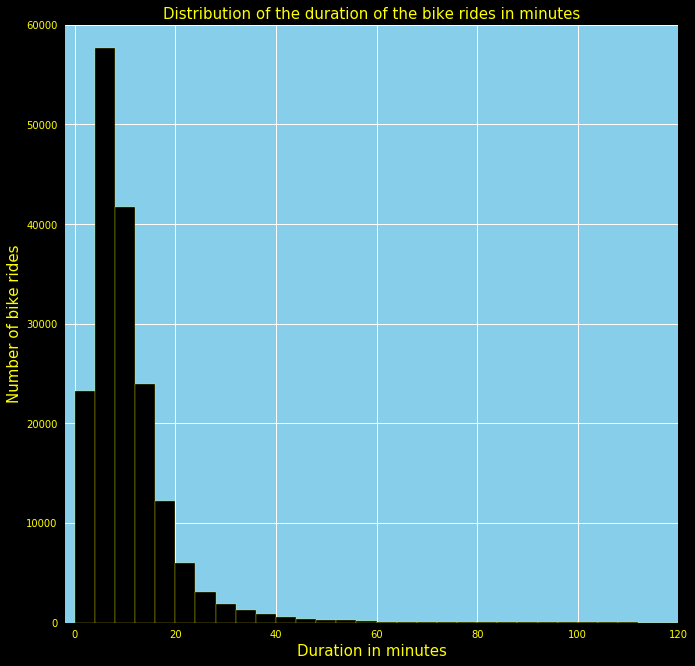

In [88]:
# plotting the distribution of the duration of the bike rides in minutes
binsize = 4
bins = np.arange(0, ford_bike_2019['duration_min'].max()+ binsize, binsize)
plt.figure(figsize=[11, 11])
plt.hist(data = ford_bike_2019, x = 'duration_min', bins = bins, color = 'black', edgecolor = 'yellow')
plt.title('Distribution of the duration of the bike rides in minutes', fontsize = 15)
plt.xlabel('Duration in minutes', fontsize = 15)
plt.ylabel('Number of bike rides', fontsize = 15)
plt.axis([-2, 120, 0, 60000])
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'skyblue', 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow', 'figure.edgecolor':'yellow'});
plt.show()

In [37]:
ford_bike_2019['duration_min'].value_counts()

5       15073
4       14675
6       14357
7       13578
8       12433
3       12196
9       10946
10       9840
11       8545
2        8074
12       7470
13       6343
14       5430
15       4712
16       3934
17       3260
1        2979
18       2741
19       2263
20       1893
21       1580
22       1344
23       1149
24        954
25        799
26        728
27        592
28        548
29        492
30        457
        ...  
597         1
979         1
467         1
211         1
1234        1
722         1
466         1
721         1
1232        1
1359        1
1103        1
335         1
207         1
1101        1
960         1
333         1
204         1
714         1
329         1
201         1
328         1
582         1
325         1
324         1
323         1
1090        1
194         1
449         1
321         1
826         1
Name: duration_min, Length: 426, dtype: int64

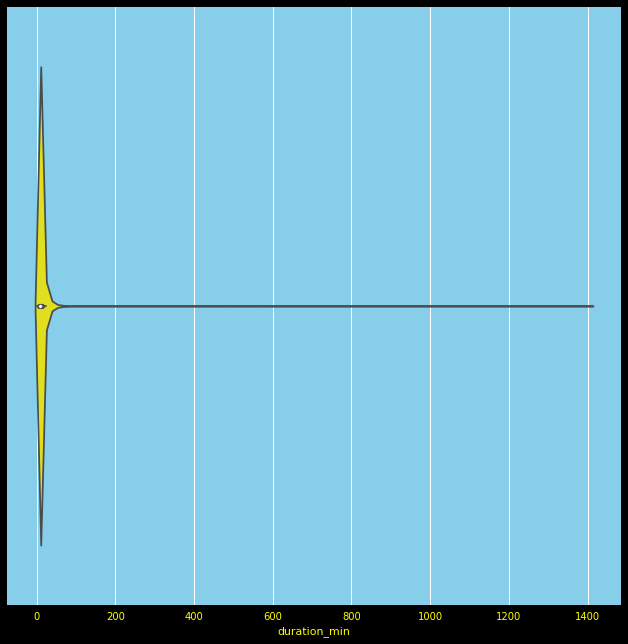

In [89]:
# using the violin plot to have a second look at the distribution of the duration of the bike rides in minutes
sns.violinplot(data=ford_bike_2019, x='duration_min', color = 'yellow',  width = 0.8);

In [39]:
ford_bike_2019['duration_min'].value_counts()

5       15073
4       14675
6       14357
7       13578
8       12433
3       12196
9       10946
10       9840
11       8545
2        8074
12       7470
13       6343
14       5430
15       4712
16       3934
17       3260
1        2979
18       2741
19       2263
20       1893
21       1580
22       1344
23       1149
24        954
25        799
26        728
27        592
28        548
29        492
30        457
        ...  
597         1
979         1
467         1
211         1
1234        1
722         1
466         1
721         1
1232        1
1359        1
1103        1
335         1
207         1
1101        1
960         1
333         1
204         1
714         1
329         1
201         1
328         1
582         1
325         1
324         1
323         1
1090        1
194         1
449         1
321         1
826         1
Name: duration_min, Length: 426, dtype: int64

### Observation(s) #1: 

- 5 minutes are the most preferred bike trip duration time interval 
- the histogram is unimodal and positively skewed. It has a right skewed distribution
- 3 to 9 minutes all have a total bike trip tally that is greater than 10,000

### Question #2:

#### What are the busiest and most relaxed hours of the day within a week in February?

### Visualization(s) #2:

In [40]:
ordered_hours = ford_bike_2019['start_hour'].value_counts().index

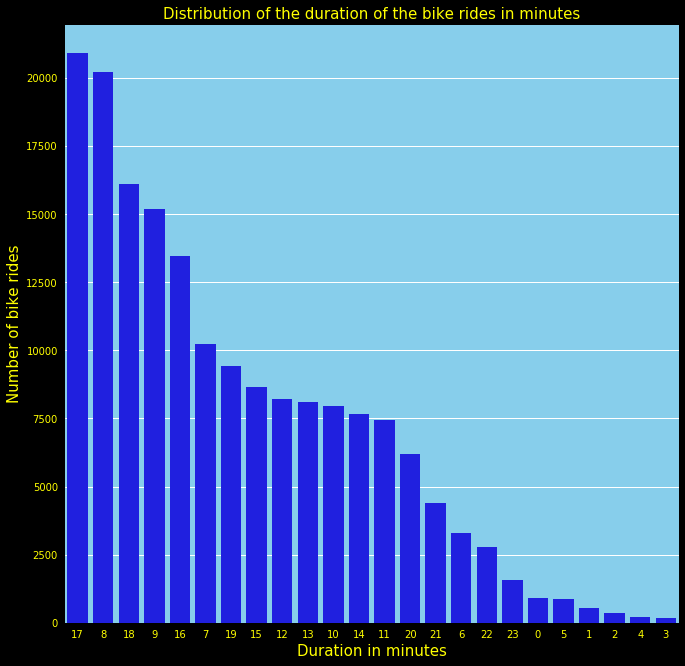

In [91]:
sns.countplot(data = ford_bike_2019, x = 'start_hour', color = 'blue', order = ordered_hours);
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'skyblue', 'figure.figsize':(11, 11), 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow'});
plt.title('Distribution of the duration of the bike rides in minutes', fontsize = 15)
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'skyblue', 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow', 'figure.edgecolor':'yellow'});
plt.xlabel('Duration in minutes', fontsize = 15);
plt.ylabel('Number of bike rides', fontsize = 15);

### Observation(s) #2:

- the 17th hour is the busiest hour of the day in February, about 5 p.m.
- the 3rd hour is the least busy in February

### Question #3:

#### What is the busiest day of the week in February?

### Visualization(s) #3:

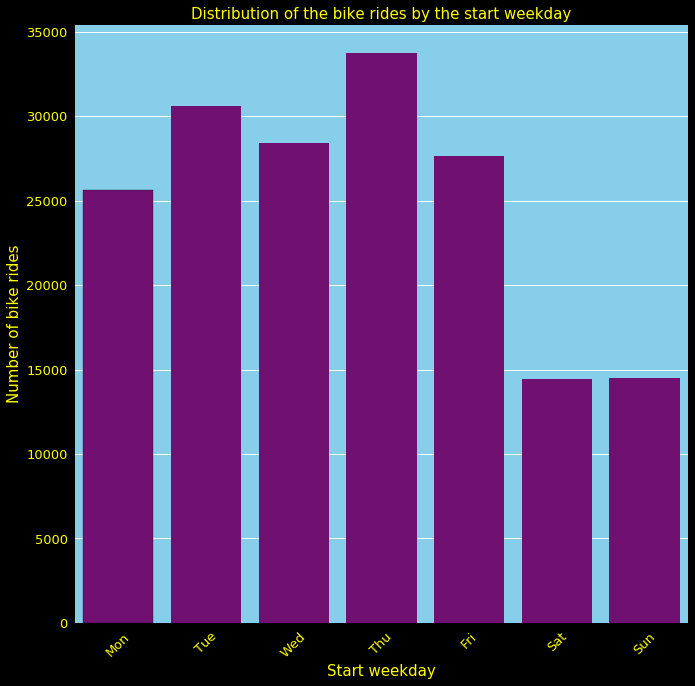

In [93]:
sns.countplot(data = ford_bike_2019, x = 'start_weekday_name', color = 'purple', edgecolor = 'black');
plt.xlabel('Start weekday', fontsize = 15);
plt.ylabel('Number of bike rides', fontsize = 15);
plt.xticks(rotation = 45, fontsize = 13);
plt.yticks(fontsize = 13);
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'skyblue', 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow', 'figure.edgecolor':'yellow'});
plt.title('Distribution of the bike rides by the start weekday', fontsize = 15);

### Observation(s) #3: 

- thursday is the busiest day of the week
- Saturday is the least busy day of the week

### Question #4:

#### What is the composition of the bike riders in the month of February?

### Visualization(s) #4:

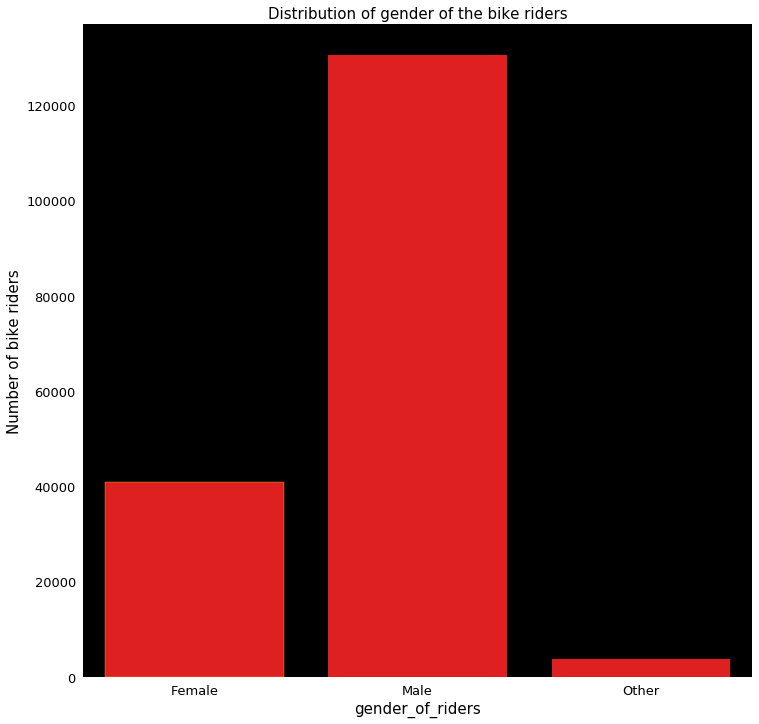

In [96]:
sns.countplot(x='member_gender', data=ford_bike_2019, color='red', edgecolor='yellow');
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 'figure.figsize':(12,12), 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'text.color':'black'});
plt.title('Distribution of gender of the bike riders', fontsize = 15);
plt.xlabel('gender_of_riders', fontsize = 15);
plt.ylabel('Number of bike riders', fontsize = 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.grid(False);

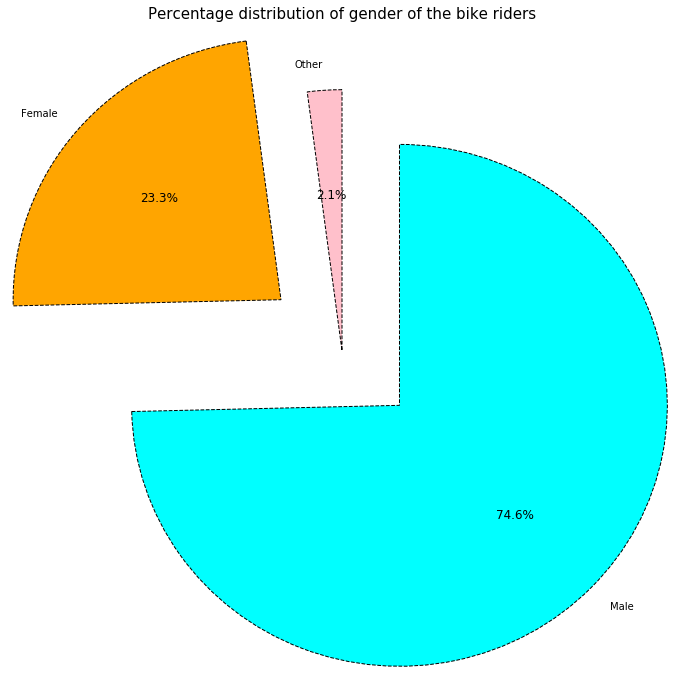

In [101]:
gender_name = ['Male', 'Female', 'Other']
gender_num = [130151, 40646, 3617]
colors = ('cyan', 'orange', 'pink')
plt.title('Percentage distribution of gender of the bike riders', fontsize = 15);
plt.pie(gender_num, labels=gender_name, autopct='%1.1f%%', startangle=90, counterclock=False, explode=(0.3, 0.3, 0), colors=colors,  wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'dashed', 'antialiased': True});
plt.show()

### Observation(s) #4: 

- the male gender has the highesst number of bike riders turning up for the event
- the male gender is 74.6% of the total population
- the female gender is 23.3% of the total population
- the other gender is only 2.1% of the total population
- the histogram is unimodal
- it has a non-symmetrical unimodal distribution
- the distribution is normal

### Question #5:

#### Describe the distribution of age in the month of February

### Visualization(s) #5:

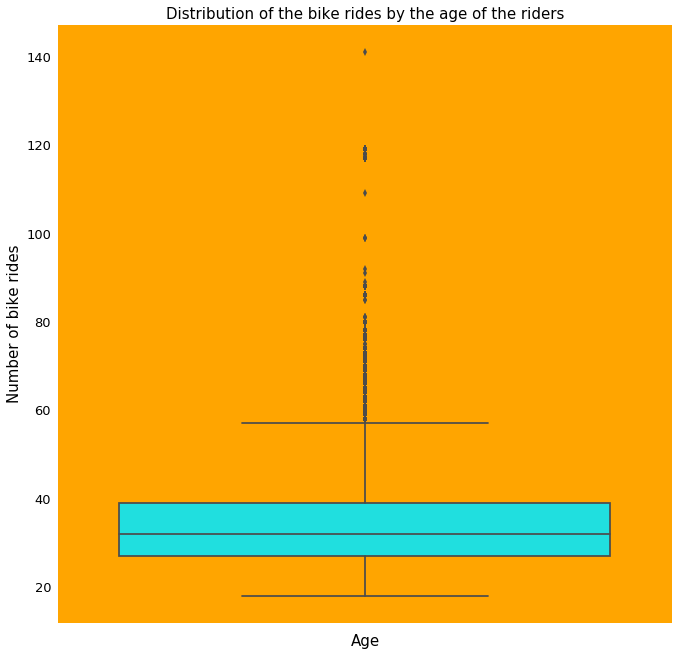

In [104]:
sns.boxplot(data = ford_bike_2019, y ='age', color = 'cyan');
plt.xlabel('Age', fontsize = 15);
plt.ylabel('Number of bike rides', fontsize = 15);
plt.title('Distribution of the bike rides by the age of the riders', fontsize = 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.grid(False);
sns.set(rc={'axes.facecolor':'orange', 'figure.facecolor':'white', 'figure.figsize':(11,11), 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'text.color':'black'});

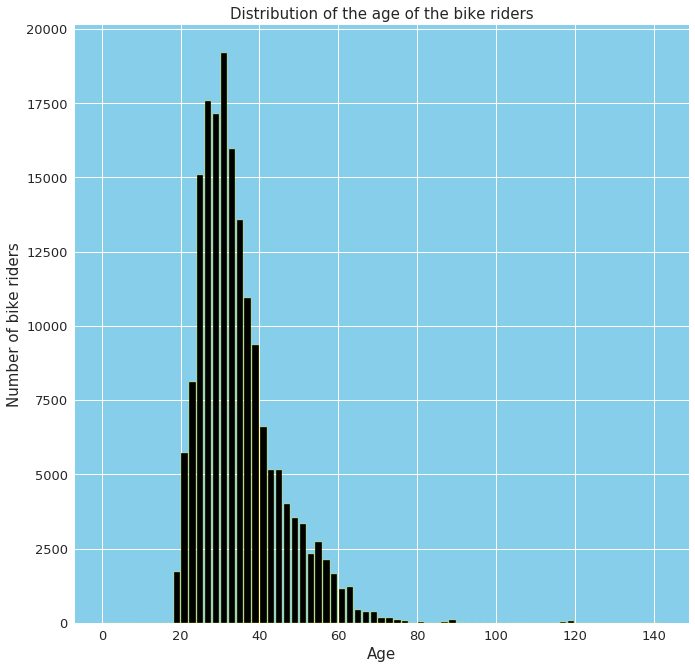

In [106]:
binsize=2
bins=np.arange(0, ford_bike_2019['age'].max()+binsize, binsize)
plt.hist(data = ford_bike_2019, x = 'age', bins = bins, rwidth=0.8, color='black', edgecolor='yellow');
sns.set(rc={'axes.facecolor':'skyblue', 'figure.facecolor':'white', 'figure.figsize':(11,11)});
plt.title('Distribution of the age of the bike riders', fontsize = 15);
plt.xlabel('Age', fontsize = 15);
plt.ylabel('Number of bike riders', fontsize = 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.gca().set_facecolor('skyblue');
plt.show()

In [48]:
ford_bike_2019['age'].value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
27      8245
32      8010
33      7953
25      7654
24      7420
34      7023
35      6557
36      5953
39      5011
37      4987
23      4637
38      4344
40      3756
22      3476
21      3208
41      2830
42      2706
45      2633
20      2504
44      2503
43      2435
46      2080
51      1927
48      1924
47      1909
       ...  
65       301
67       189
68       180
69       178
66       158
72       135
64       134
74       105
70        99
88        89
119       53
71        51
18        34
76        30
77        21
86        20
73        19
80        11
117       11
78         9
118        6
99         3
81         3
85         2
75         2
92         1
91         1
109        1
89         1
141        1
Name: age, Length: 75, dtype: int64

### Observation(s) #5: 

- the histogram has a non-symmetrical unimodal right skewed distribution of the age of the age of the riders across the entire dataset.
- bike riders aged 31 have the highest number turn up of 10214 at the riding event. 

### Question #6:

#### Describe the composition of the user type of all the bike riders in the month of February

### Visualization(s) #6:

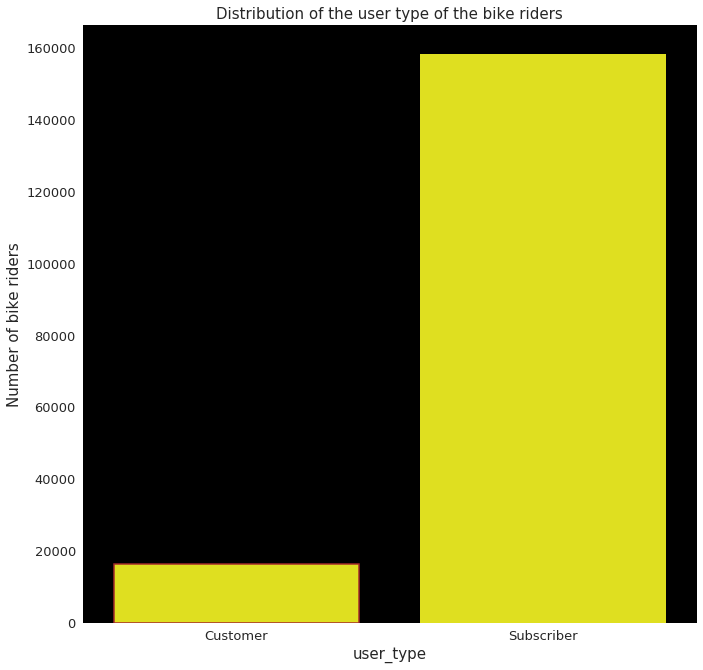

In [109]:
sns.countplot(data = ford_bike_2019, x = 'user_type', color = 'yellow', edgecolor = 'brown', linewidth=1.5);
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'});
plt.title("Distribution of the user type of the bike riders", fontsize = 15);
plt.xlabel('user_type', fontsize = 15);
plt.ylabel('Number of bike riders', fontsize = 15);
plt.grid(False);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.show()

In [50]:
ford_bike_2019['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

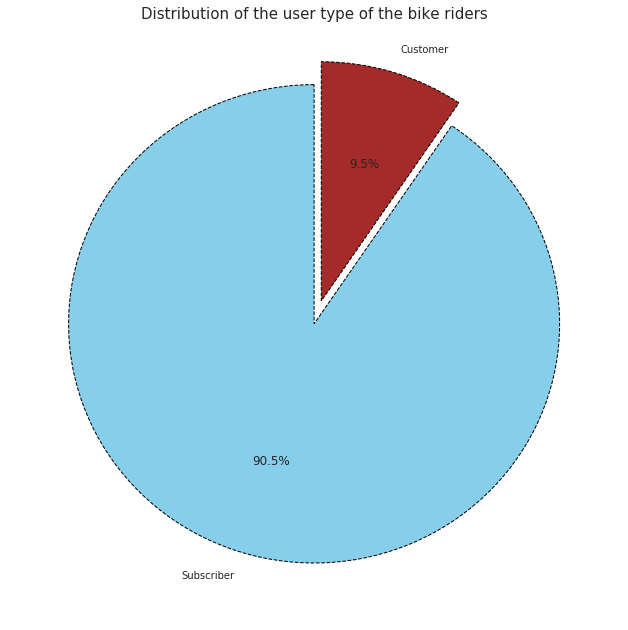

In [114]:
user_name = ['Customer', 'Subscriber']
user_num = [16566, 158386]
colors = ('brown', 'skyblue')
plt.title("Distribution of the user type of the bike riders", fontsize = 15)
plt.pie(user_num, labels=user_name, autopct='%1.1f%%', startangle=90, counterclock=False, explode=[0.1,0], colors=colors,  wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'dashed', 'antialiased': True});
plt.rcParams['font.size'] = 12
plt.show()

In [52]:
ford_bike_2019['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

### Observation(s) #6: 

- Subscribers use 90.5% of the total bike trip population, that is, 158386
- Customers only use 9.5% of the total bike trip population, that is, 16566

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The bike trip duration feature was the center of focus. The users used the bike riding system extensively. The first five days of the week are used actively by the riders. The peak hours for the bike riders are 8 a.m. and 5 p.m. Males persons dominate the bike trip population. Bike riders aged 25 to 35 are the most engaged unlike other age groups. Over 90% of the bike riding trips are dominate by subscriber bike riders.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I simply cleaned the data set initially by dropping all the missing values before visual exploration. The bike trip duration was only in seconds at first. This had to be converted to minutes and given a new data column which is ‘duration_min’ data column. 

>The start hour of the day was extracted from the ‘start_time’ details, the same applies to determining the day of the week. The age of the users had to be determined using the member birth year against the year of the dataset


<a id='2variables'></a>
## Bivariate Exploration

### Question #8:

#### What s the relationship between the age of the bike riders and the duration of the bike trips in minutes ? 

### Visualization(s) #8:

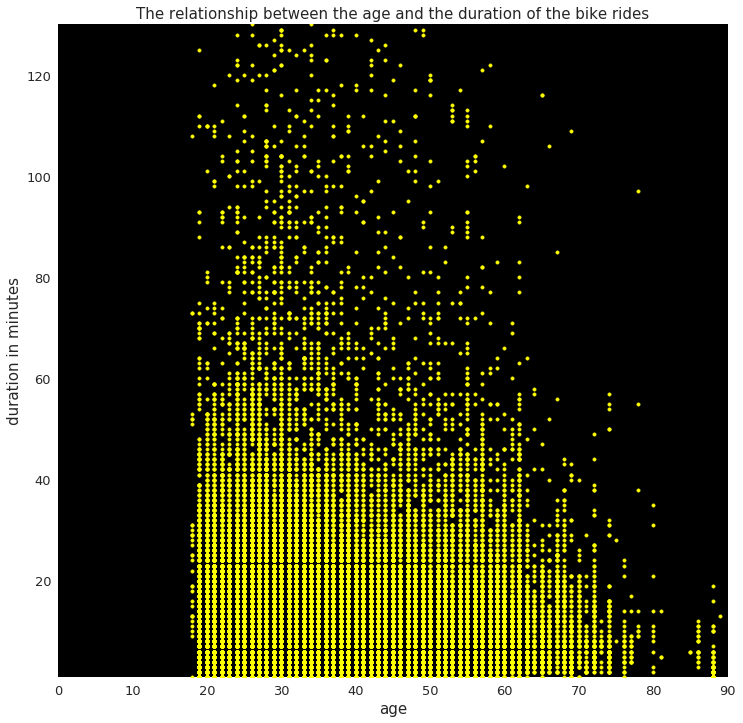

In [53]:
plt.figure(figsize=[12,12]);
plt.scatter(ford_bike_2019['age'], ford_bike_2019['duration_min'], alpha = 1, marker = '.', color='yellow');
plt.grid(False);
plt.axis([0, 90, 1, 130]);
plt.title('The relationship between the age and the duration of the bike rides', fontsize = 15);
plt.xlabel('age', fontsize = 15);
plt.ylabel('duration in minutes', fontsize = 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
sns.set(rc={'axes.facecolor':'black', 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'text.color':'black'});
plt.show();

### Observation(s) #8: 

- there is a moderate negative correlation betweeen the age of the bikers and the duration of the bkie trips in minutes
- there is an indirect proporptionality between the age and duration in minutes variables
- therefore, increase in the age of the bike riders will gradually lead to a decrease in the number of bike trips

### Question #9:

#### What is the relationship between age and the start hours of the bike rides?

### Visualization(s) #9:

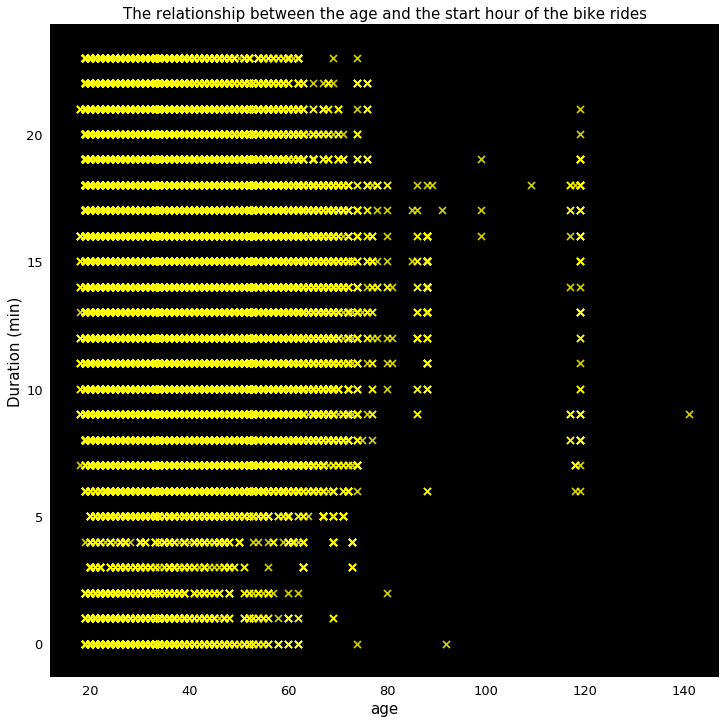

In [54]:
# scatter plot showing the relationship between age and the start hours of the bike rides 

plt.figure(figsize=[12, 12])
plt.yticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25]);
plt.scatter(data = ford_bike_2019, x = 'age', y = 'start_hour', alpha = 0.8, marker = 'x', color='yellow');
plt.grid(False);
plt.title('The relationship between the age and the start hour of the bike rides', fontsize = 15);
plt.xlabel('age', fontsize = 15);
plt.ylabel('start hour', fontsize = 15); 
plt.xlabel('age');
plt.gca().set_facecolor('black');
plt.ylabel('Duration (min)');
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

### Observation(s) #9: 

- based on the shared graph information above, there is no significant correlation between the age of the bike riders and the start hours of the bike riders  

### Question#10:

#### What is the relationship between the start hours and the days of the week?

### Visualizations#10:

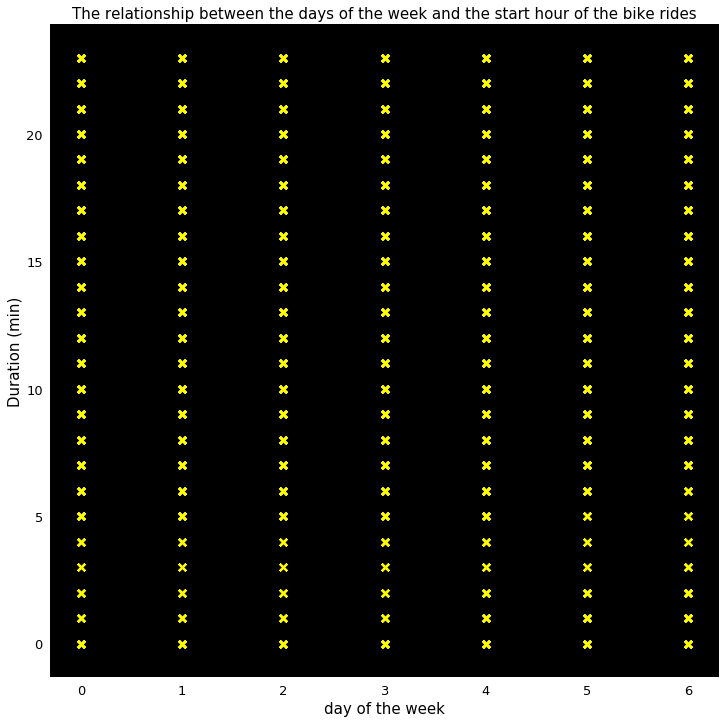

In [55]:
# scatter plot showing the relationship between age and the start hours of the bike rides 

plt.figure(figsize=[12, 12])
plt.yticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25]);
plt.scatter(data = ford_bike_2019, x = 'start_weekday_no', y = 'start_hour', alpha = 0.8, marker = 'x', color='yellow');
plt.grid(False);
plt.title('The relationship between the days of the week and the start hour of the bike rides', fontsize = 15);
plt.xlabel('day of the week', fontsize = 15);
plt.ylabel('start hour', fontsize = 15); 
plt.gca().set_facecolor('black');
plt.ylabel('Duration (min)');
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

### Observations#10:

- there isn't any correlation at all between the days of the week and the start hours of the bike rides

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There exists a moderate negative correlation between the age and the duration  in minutes for the bike rides, however, there isn't any existing correlation between the age and the start hours.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other interesting relationship was that of the daya of the week against the start_hours, basically, there isn't a correlations as well. For the ages ranging from 20 to 40 years, the duration ranges from 2 to 30 minutes. Both user types have their peak hours at 5 p.m. and 8 p.m.
 

<a id='manyvariables'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question #10:

#### What is the contrast and comparison between the correlation of subcribers and customers to the duration in minutes?

### Visualization(s) #10:

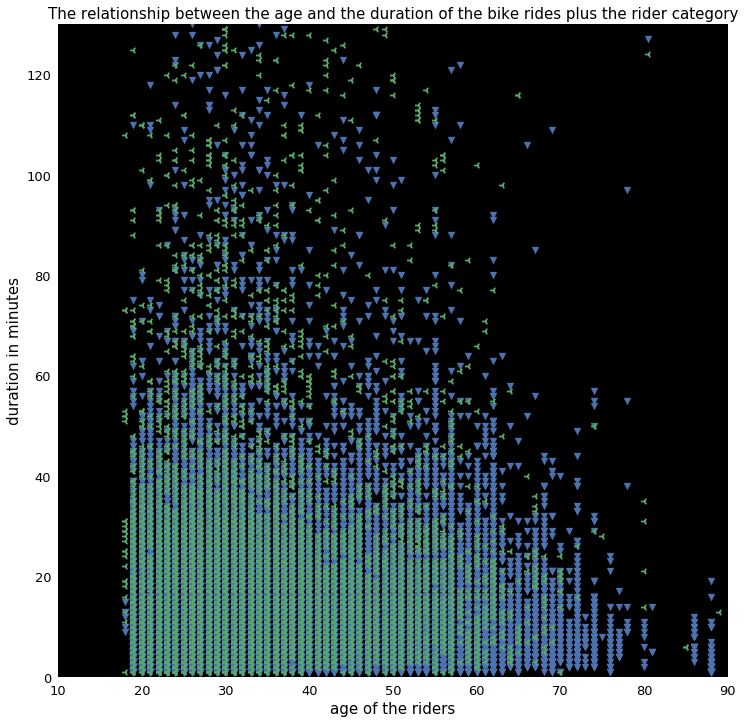

In [56]:
plt.figure(figsize=[12,12])
rider_type = [['Subscriber', 'v'],['Customer', '3']]

for rider_type1, marker in rider_type:
    ford_bike_2019_usertype = ford_bike_2019[ford_bike_2019['user_type'] == rider_type1]
    plt.scatter(ford_bike_2019_usertype['age'], ford_bike_2019_usertype['duration_min'], marker = marker, alpha= 1)
plt.legend(['Subscriber','Customer'])
plt.axis([10, 90, 0, 130 ])
plt.title('The relationship between the age and the duration of the bike rides plus the rider category', fontsize = 15);
plt.xlabel('age of the riders', fontsize = 15);
plt.ylabel('duration in minutes', fontsize = 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);
plt.gca().set_facecolor('black');
plt.grid(False);
plt.show()

### Observation(s) #10: 

- subscribers basically have a stronger correlation than the customer users

### Question #11:

#### Who covers the longest distance between customers and subscribers?

### Visualization(s) #11:

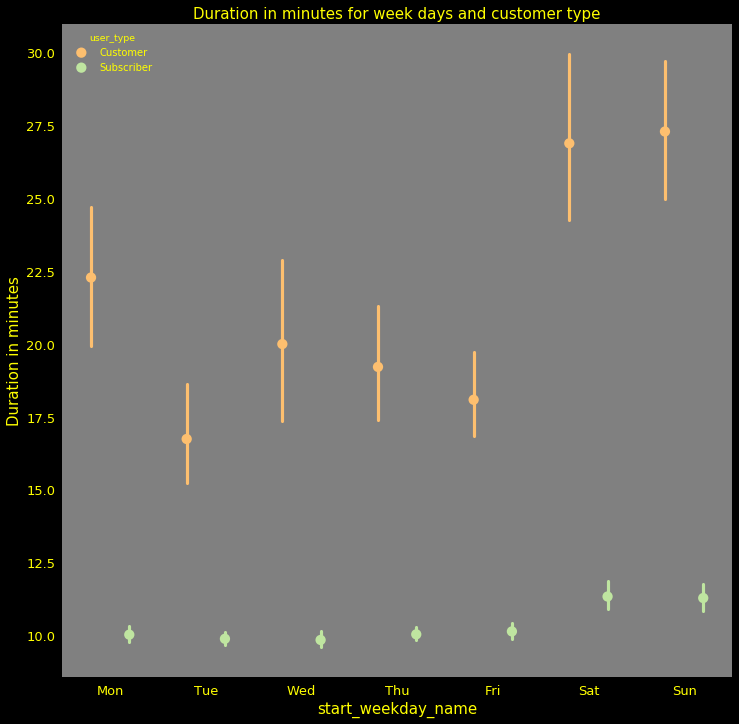

In [82]:
plt.figure(figsize = [12,12]);
ax = sns.pointplot(data = ford_bike_2019, x ='start_weekday_name', y = 'duration_min', hue = 'user_type',
           palette = 'Spectral', linestyles = '', dodge = 0.4, alpha=1.0);
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'gray', 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow'});
plt.title('Duration in minutes for week days and customer type', fontsize=15);
plt.grid(False);
plt.ylabel('Duration in minutes', fontsize=15);
plt.xlabel('start_weekday_name', fontsize=15);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
ax.set_yticklabels([],minor = True)
plt.show()

### Observation(s) #11: 

- customers travel longer distances while subscribers travel shorter distances

### Question #12:

#### Who covers the longest miles among males, females and other gender type?

### Visualization(s) #12:

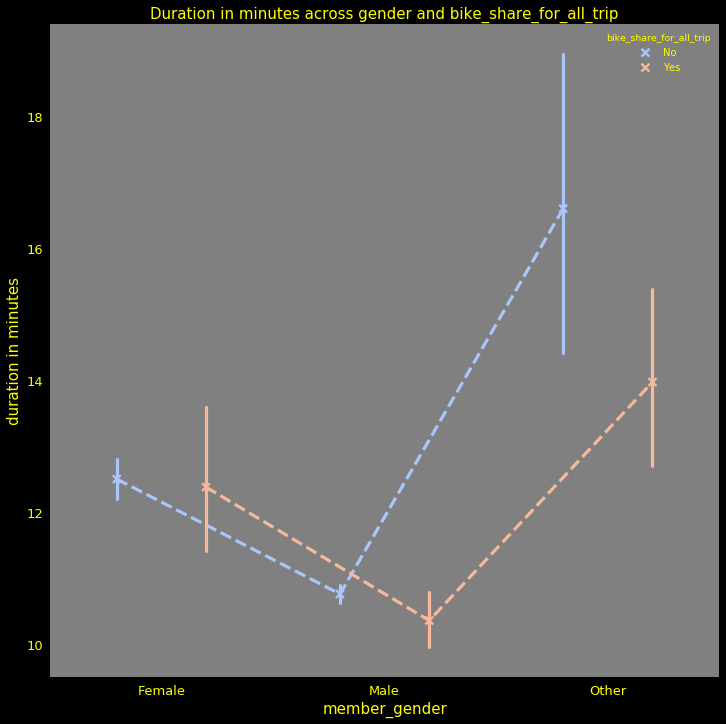

In [86]:
plt.figure(figsize = [12,12]);
ax = sns.pointplot(data = ford_bike_2019, x ='member_gender', y = 'duration_min', hue = 'bike_share_for_all_trip', palette = 'coolwarm', linestyles='dashed', markers='x', dodge = 0.4, alpha=1.0);
sns.set(rc={'figure.facecolor':'black', 'axes.facecolor':'gray', 'axes.labelcolor':'yellow', 'xtick.color':'yellow', 'ytick.color':'yellow', 'text.color':'yellow'});
plt.title('Duration in minutes across gender and bike_share_for_all_trip', fontsize=15);
plt.grid(False);
plt.ylabel('duration in minutes', fontsize=15);
plt.xlabel('member_gender', fontsize=15)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
ax.set_yticklabels([], minor = True);
plt.show()

### Observation(s) #12: 

- the other gender type covers the greatest miles 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Subscribers have a higher age range than customers

### Were there any interesting or surprising interactions between features?

> Subscribers use the bike rides for longer period of times than the customers. The subscribers have a higher age range than the customers

<a id='conclude'></a>
## Conclusions
> - 5 minutes are the most preferred bike trip duration time interval
    - the 17th hour is the busiest hour of the day in February, about 5 p.m.
    - thursday is the busiest day of the week
    - the male gender has the highest number of bike riders turning up for the event


In [56]:
# saving the clean dataset into as a csv file that will come in handy at the nex stage
ford_bike_2019.to_csv('ford_bike_clean.csv', index=False)